In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#loading titanic dataset
data=sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.shape

(891, 15)

In [7]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
#for missing values
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [12]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


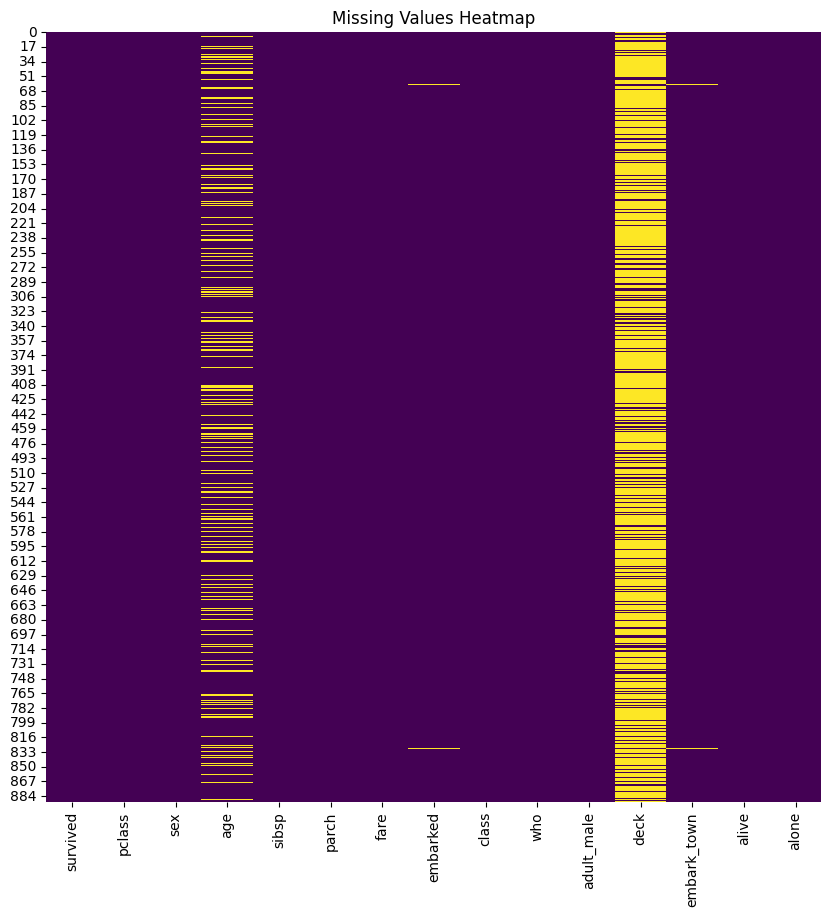

In [15]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [22]:
#filling missing values
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
data_filled=data.copy()

numeric_data=data_filled.select_dtypes(include=['number']).columns
categorical_data=data_filled.select_dtypes(exclude=['number']).columns

In [26]:
#using IterativeImputer for numeic_data
imputer=IterativeImputer(estimator=RandomForestRegressor(),random_state=0)
data_filled[numeric_data]=imputer.fit_transform(data_filled[numeric_data])

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
#for categorial data with mode
for col in categorical_data:
    data_filled[col].fillna(data_filled[col].mode()[0],inplace=True)


<ipython-input-27-2592650316>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[col].fillna(data_filled[col].mode()[0],inplace=True)


In [28]:
#check if we still have missing data left
data_filled.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


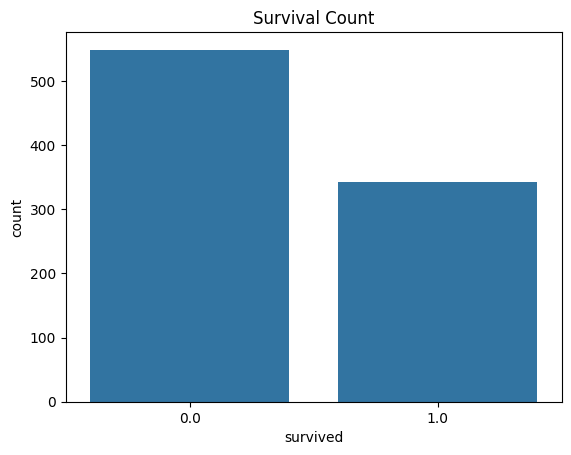

Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


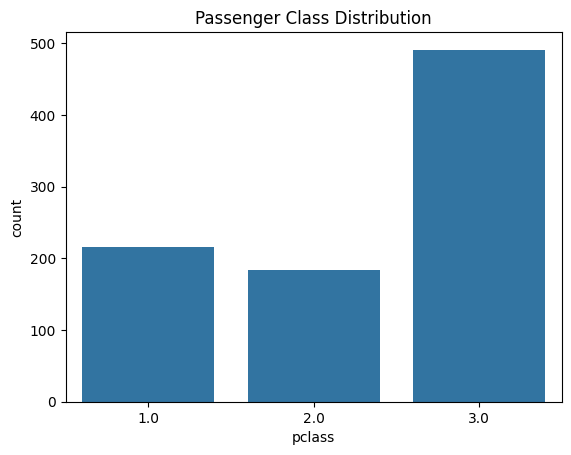

Age Statistics:
 count    891.000000
mean      29.659431
std       13.763455
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


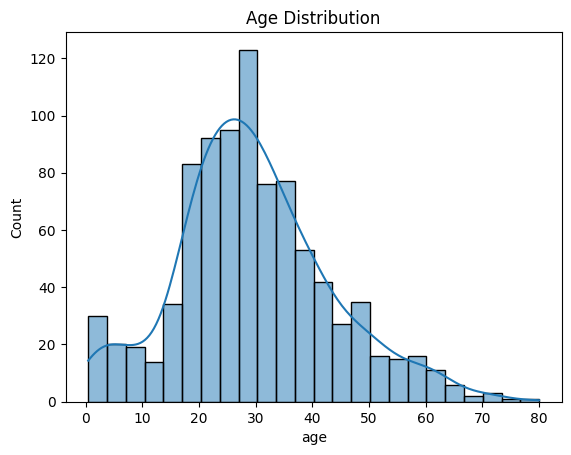

Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


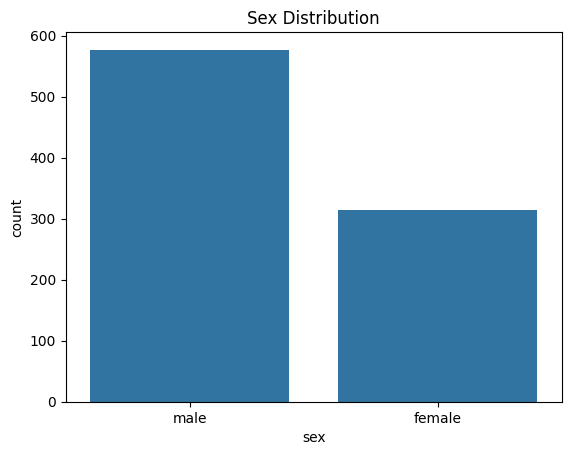

In [30]:
# Analyze 'survived'
print("Survival Count:\n",data_filled['survived'].value_counts())
sns.countplot(x='survived', data=data_filled)
plt.title('Survival Count')
plt.show()

# Analyze 'pclass'
print("Pclass Distribution:\n",data_filled['pclass'].value_counts())
sns.countplot(x='pclass', data=data_filled)
plt.title('Passenger Class Distribution')
plt.show()

# Analyze 'age'

print("Age Statistics:\n",data_filled['age'].describe())
sns.histplot(x='age', data=data_filled, kde=True)
plt.title('Age Distribution')
plt.show()

# Analyze 'sex'
print("Sex Distribution:\n", data_filled['sex'].value_counts())
sns.countplot(x='sex', data=data_filled)
plt.title('Sex Distribution')
plt.show()


Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


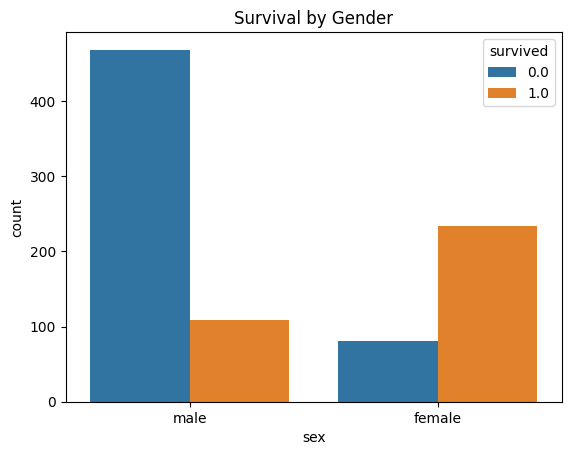


Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


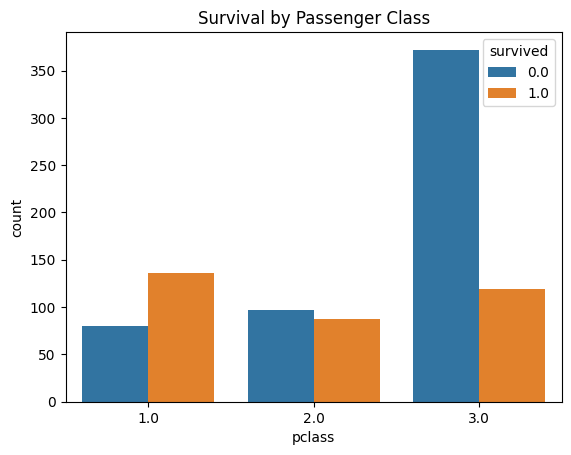

<ipython-input-31-4203796390>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n",data_filled.groupby('age_group')['survived'].value_counts())



Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          76
Adult      0.0         462
           1.0         265
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


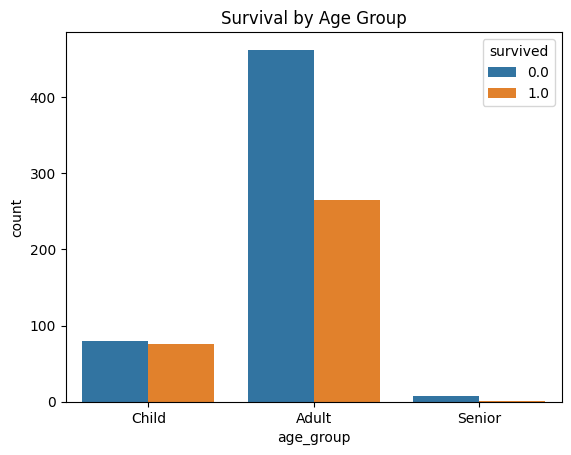


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


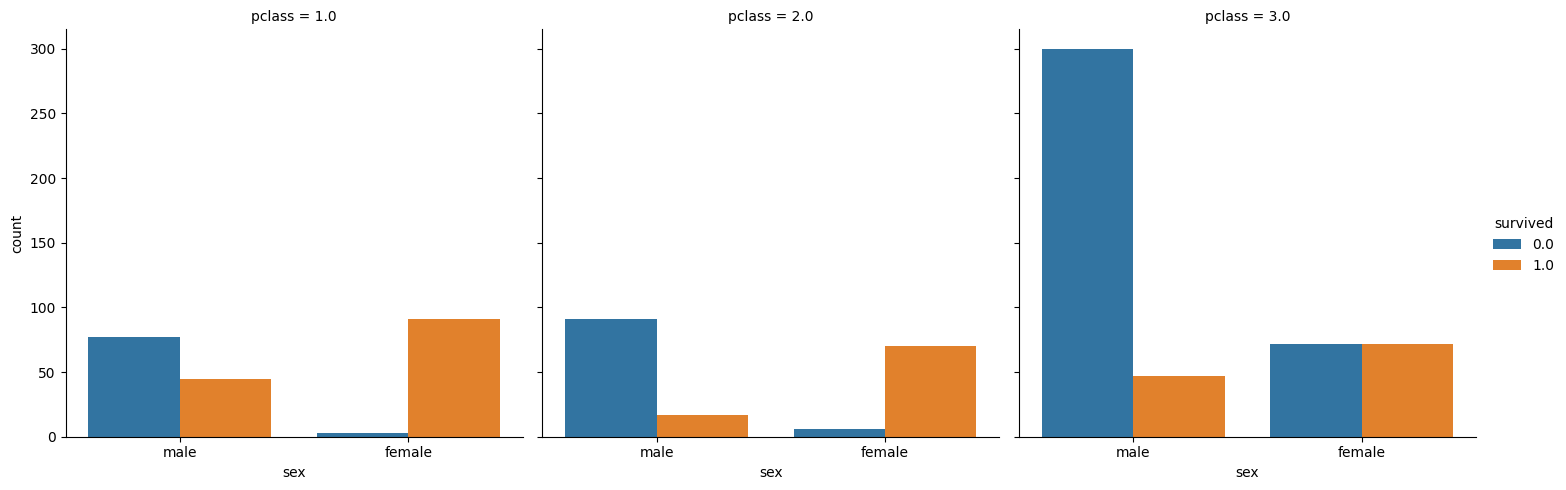

In [31]:
# Analyze survival based on gender
print("\nSurvival by Gender:\n",data_filled.groupby('sex')['survived'].value_counts())
sns.countplot(x='sex', hue='survived', data=data_filled)
plt.title('Survival by Gender')
plt.show()

# Analyze survival based on passenger class
print("\nSurvival by Passenger Class:\n",data_filled.groupby('pclass')['survived'].value_counts())
sns.countplot(x='pclass', hue='survived', data=data_filled)
plt.title('Survival by Passenger Class')
plt.show()

# Analyze survival based on age groups (create age bins)
data_filled['age_group'] = pd.cut(data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])
print("\nSurvival by Age Group:\n",data_filled.groupby('age_group')['survived'].value_counts())
sns.countplot(x='age_group', hue='survived', data=data_filled)
plt.title('Survival by Age Group')
plt.show()


# Further exploration: Analyze survival based on combinations of factors
# Survival based on gender and class
print("\nSurvival by Gender and Class:\n", data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=data_filled)
plt.show()

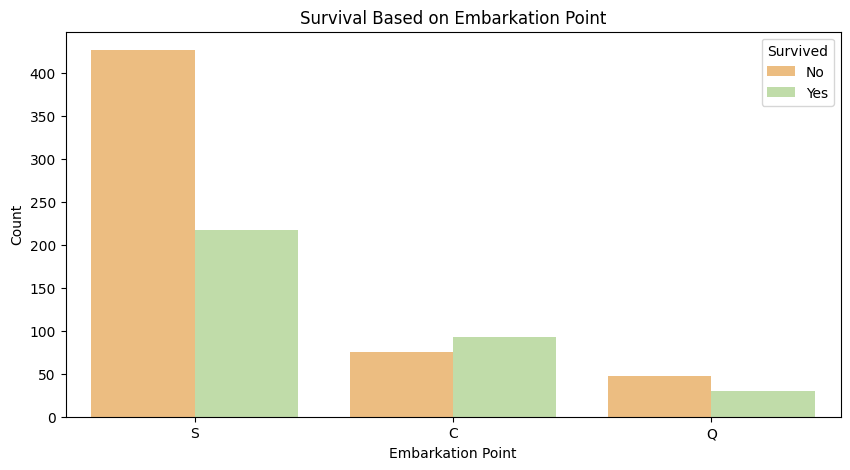

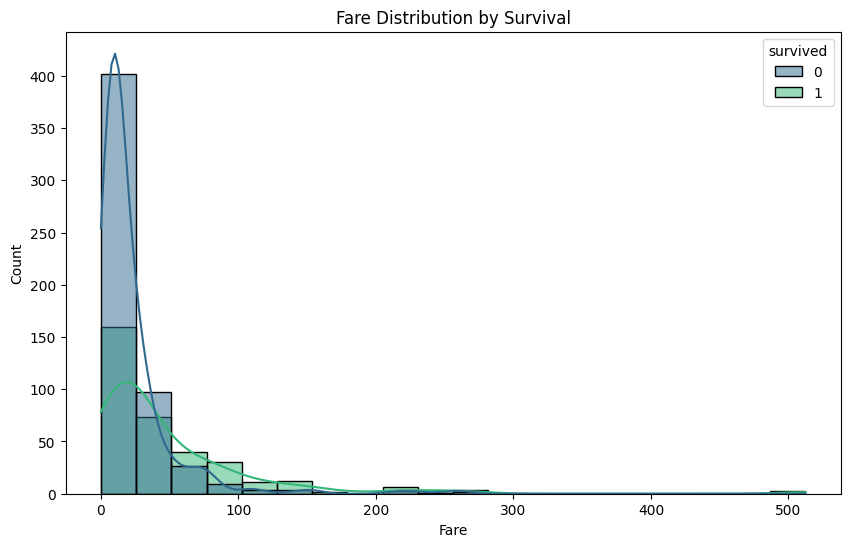

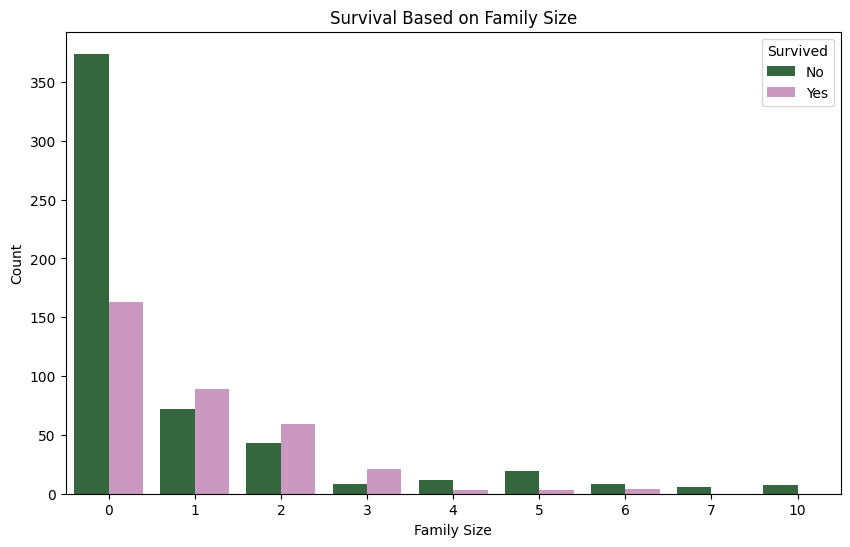

In [32]:
# Survival Based on Embarkation Point
plt.figure(figsize=(10, 5))
sns.countplot(x='embarked',hue='survived',data=data,palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

# Survival Based on Fare
plt.figure(figsize=(10, 6))
sns.histplot(data,x='fare',hue='survived',bins=20,kde=True,palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


# Family Size Analysis
data['family_size'] = data['sibsp']+data['parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size',hue='survived',data=data,palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
